In [1]:
# Libraries required
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Question 1 - Exploration of Historical Trends
### Question 1.1

In the first place, we add a column to the dataframe called 'Decade' in which we round down the end year of the campaign to get the corresponding decade. Then we filter the campaings based on whether they were violent and plot the count of the filtered campaings in each decade with blue colour. Afterwards we plot the count of all campaings in each decade with orange colour. 

The idea behind this is that in order to stack the non-violent campaings on top of the violent ones we have to add the number of the non-violent campaings to the violent ones. But non-violent campaings + violent campaings = total number of campaings. 

Also we fill the area underneath the lines and draw the lines of the violent campaings with white colour to get the desired result. Finally we add grid lines and the figure's legend.


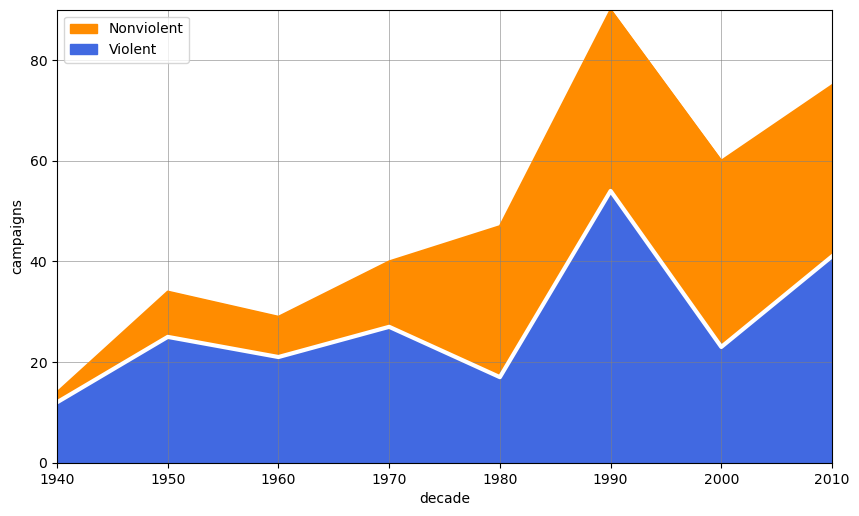

In [2]:
df = pd.read_csv('NAVCO 1.2 Updated.tab', sep='\t')
df['Decade'] = (df['EYEAR']//10)*10

# Create a line plot connecting the different points
plt.figure(figsize=(10,6), dpi=100)

# Count the number of violent campaings in each decade
viol_counts = df[df['VIOL'] == 1]['Decade'].value_counts().sort_index()

# Count the total number of campaings in each decade
non_viol_counts = df['Decade'].value_counts().sort_index()

# Plot the violent and total number of campaings on each decade
plt.plot(non_viol_counts.index, non_viol_counts.values, linestyle='-', color='darkorange')
plt.plot(viol_counts.index, viol_counts.values, linestyle='-', linewidth =3, color = 'white')

plt.xlim(1940, 2010)
plt.ylim(0,90)

# Set major and minor locators for x-axis
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))  
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))
# Set major and minor locators for y-axis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))  
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20)) 

# Show grid with specific formatting
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.4, color='gray')

# Fill the area below the line
plt.fill_between(non_viol_counts.index, non_viol_counts.values, color='darkorange', alpha=1)
plt.fill_between(viol_counts.index, viol_counts.values, color='royalblue', alpha=1)

plt.xlabel('decade')
plt.ylabel('campaigns')

# Create a legend with colored rectangles
legend_rect1 = mpatches.Patch(color='darkorange', label='Nonviolent')
legend_rect2 = mpatches.Patch(color='royalblue', label='Violent')

plt.legend(handles=[legend_rect1, legend_rect2], loc='upper left')


plt.show()

From the plot above we notice that there is an updwards trend in the number of campaigns per decade which peaked in the 90's decreased in 2000's but increased again in 2010 - we have to take into consideration that the rounding per decade can influence the results. Till the 1960's-70's violent campaings were far more common, but since then non-violent campaings are increasing in popularity.

### Question 1.2

In the first place the number of non-violent campaigns in each decade is calculated along with the success percentage for campaigns in each decade.

Then a bar-plot with two different y axes is created making sure that there is space between the bars, representing the number of non-violent campaings and the percentage of success. 

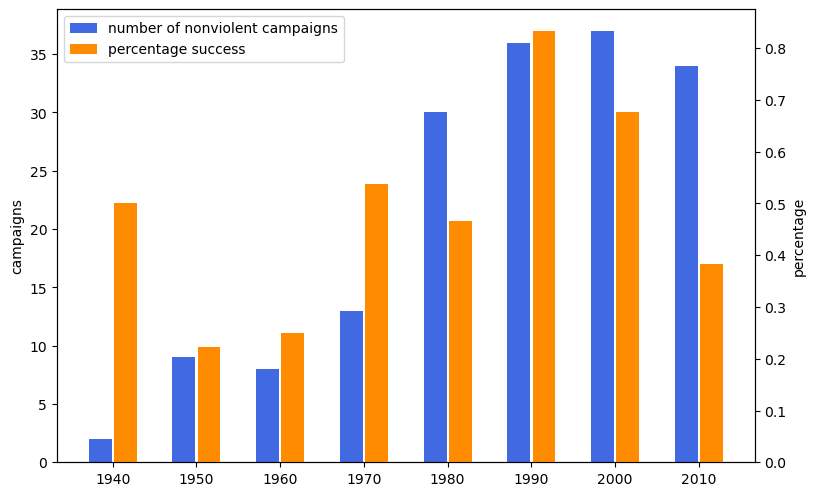

In [3]:
# Data
non_violent = df[df['NONVIOL'] == 1]['Decade'].value_counts().sort_index()
success_percentage_nonviol = df[df['NONVIOL']==1].groupby('Decade')['SUCCESS'].mean()

# Create the figure and the first y-axis
bar_width = 3

fig, ax1 = plt.subplots(figsize=(9, 6), dpi=100)
ax1.bar(non_violent.index - bar_width/2, non_violent.values, width=bar_width/1.1, color='royalblue', label='number of nonviolent campaigns')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.bar(non_violent.index + bar_width/2, success_percentage_nonviol.values, width= -bar_width/1.1, color='darkorange', label='percentage success')

# Customize the plot
ax1.set_ylabel('campaigns')
ax2.set_ylabel('percentage')

# Combine legends from both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


# Show the plot
plt.show()

From the figure above we notice that in earlier decades the number of non-violent campaings was relatively lower but in recent years it is increasing. It doesn't appear to be a clear correlation between the decades and the success rates of the campaigns, or the number of campaings and the corresponding success rate. 

### Question 1.3

In the first place the percentage of success for violent campaings for each decade is calculated.

Then a bar-plot with a common y axis but two bars is created making sure that there is space between the bars representing the success rates for violent and non-violent campaings. 

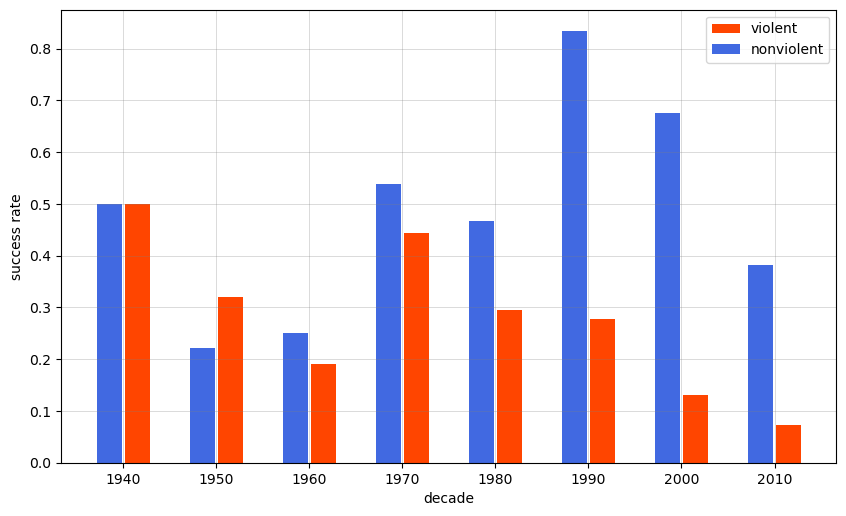

In [4]:
# Data
success_percentage_viol = df[df['VIOL']==1].groupby('Decade')['SUCCESS'].mean()
bar_width = 3

# Plot the first set of bars
plt.figure(figsize=(10,6), dpi=100)
plt.bar(success_percentage_viol.index + bar_width/2, success_percentage_viol.values, width=bar_width/1.1, color='orangered', label='violent')

# Plot the second set of bars
plt.bar(success_percentage_viol.index - bar_width/2, success_percentage_nonviol.values, width=bar_width/1.1, color='royalblue', label='nonviolent')

# Customize the plot
plt.xlabel('decade')
plt.ylabel('success rate')

# Set major and minor locators for y-axis
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1)) 

# Show grid with specific formatting
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.4, color='gray', alpha =0.5)

# Add a common legend
plt.legend()

# Display the plot
plt.show()

From the figure above, one can assume non-violent campaings appear to have higher success rates especially in recent decades. Since the 1960's the success rates of non-violent campaings is significantly higher than the violent ones.

## Question 2 - Largest Resistance Campaigns, 1946-2014

In the first place the dataset is sorted based on the Percent of target’s national population involved in the peak
event. Accordingly a column is added with a default value of 'black' where in the case of campaign limited success is 'grey' and in the case of campaing failure is 'red'.

Then using plt.barh an horizontal bar plot is created with:
- each barplot derives its color from the column colors defined above
- the names on the y axis being a combination of the LOCATION and TARGET columns of the dataframe 
- each bar annotated with the percentage of participation in the peak event 
- a legend with the color coresponding to success, failure and partial sucess

/var/folders/qf/5rvllq2n4g5_qsf6vgcj00w80000gn/T/ipykernel_10607/3846797722.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0%}'.format(val) for val in plt.gca().get_xticks()])


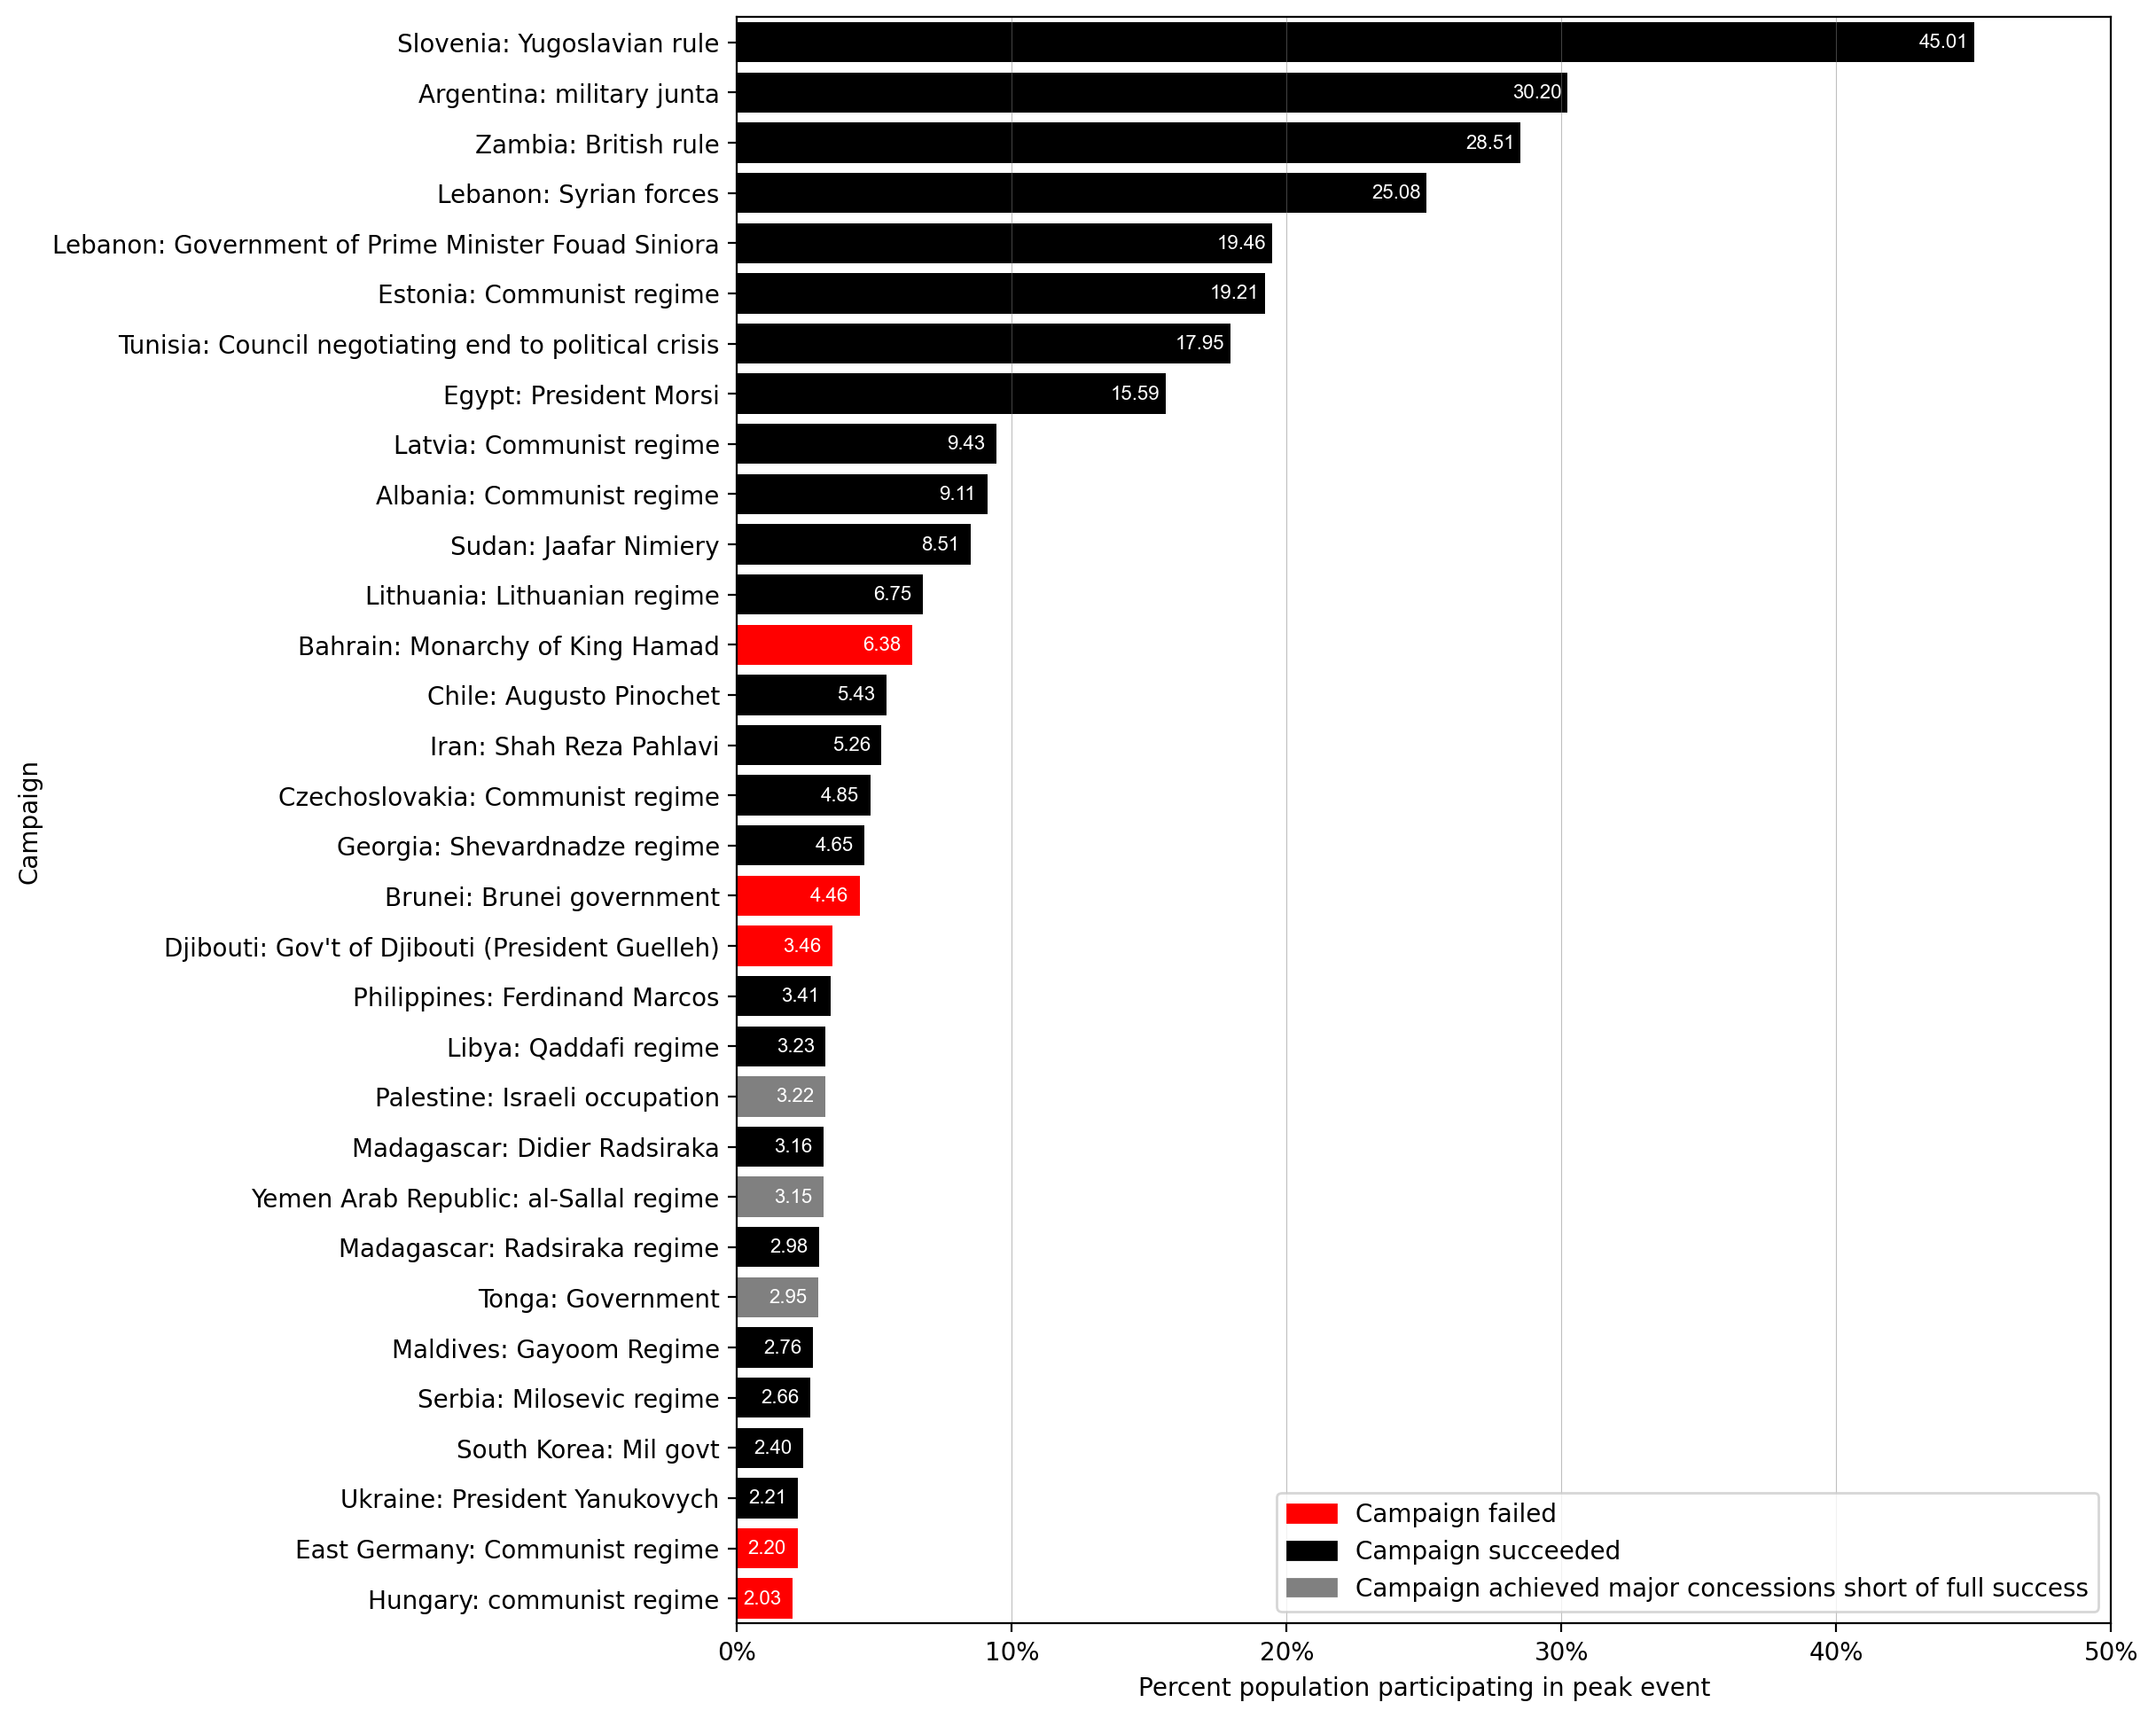

In [5]:
# Data handling
filtered_df = df[df['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02]

df_sorted = filtered_df.sort_values(by ='PERCENTAGEPOPULARPARTICIPATION', ascending= True)

df_sorted['colors'] = 'black'
df_sorted.loc[df['FAILURE'] == 1, 'colors'] = 'red'
df_sorted.loc[df['LIMITED'] == 1, 'colors'] = 'grey'
plt.figure(figsize=(10,12), dpi=200)

y_bars = (df_sorted['PERCENTAGEPOPULARPARTICIPATION'].values)

# Plot
# Create a horizontal bar plot
bars = plt.barh((df_sorted['LOCATION'].values+': '+df_sorted['TARGET'].values), y_bars, color=df_sorted['colors'], height=0.8)

# Customize the plot
plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')

# Display percentage symbols on the x-axis
plt.gca().set_xticklabels(['{:.0%}'.format(val) for val in plt.gca().get_xticks()])

# Annotate the bars with their actual values with 2 decimal digits
for bar, y_bar in zip(bars, y_bars):
    plt.text(bar.get_width()- 0.011, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(round(y_bar*100,+2)),
             ha='center', va='center', color = 'white', fontdict={'family': 'arial', 'size': 8})
    
# Remove the margins from the bottom and top of the figure
plt.ylim(-0.5,len(y_bars)-.5)

# Add grid lines
plt.grid(True, which='both', axis='x', linestyle='-', linewidth=0.4, color='gray', alpha =0.5)

# Define x axis values
plt.xlim(0, 0.5)


# Create a dictionary mapping colors to legend labels
legend_labels_dict = {'red': 'Campaign failed', 'black': 'Campaign succeeded', 'grey': 'Campaign achieved major concessions short of full success'}

# Create legend based on the colors
legend_labels = [legend_labels_dict[color] for color in df_sorted['colors'].unique()]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in df_sorted['colors'].unique()]
plt.legend(legend_handles, legend_labels)

# Display the plot
plt.show()

From the figure above it can be derived that campaings supported by more than 2.2% of the population during their peak event are more likely to succeed or have at least partial success. Especially above 5% of the population there is only one failed campaing indicating that participation can be used to predict the outcome of a campaign.

In [6]:
df.loc[df['LOCATION']=='Greece']['PERCENTAGEPOPULARPARTICIPATION']


119    0.005092
120    0.000279
Name: PERCENTAGEPOPULARPARTICIPATION, dtype: float64

For Greece there are only 2 campaings. What is worth noting especially for the Greek antimilitary campaign is the really low participation and duration. Despite this the campaign was successful something that seems uncommon for our dataset.

## The effect of participation on the probability of Campaign Success

In the first place membership per capita needs to be calculated. Membership per capita is defined as
$$
\frac{\log(\text{participation})}{\log(\text{population})}
$$

To calculate the membership per capita the population needs to be calculated.
$$
\text{population} = \frac{\text{Participation}}{\text{Percentage Popular Participation}}
$$

Once membership per capita is calculated a logistic regression is implemented with dependent variable the success of the campaign and independent variables the membership per capita and the logged population. Using the prediction function the probability of success for each campaing is calculated and plotted against membership per capita. 

It is worth mentioning that when using the sickit library to perform the logistic regression we have to discourage/ prevent regularisation in order to produce the desired figure. To do that we set the C value equal to 1e9 (a very big value essentially). 

Then the same steps for the logistic regression are repeated but this time only for the membership per capita as independent variable.

In [8]:
# Calculate Population from data provided
# logPARTICIPATION / logPERCENTAGE POPULAR PARTICIPATION.
df['Population'] = df['PARTICIPATION'] / df['PERCENTAGEPOPULARPARTICIPATION']
df['Population'].describe()

count    3.800000e+02
mean     7.804367e+07
std      2.156280e+08
min      8.960300e+04
25%      5.485543e+06
50%      1.461655e+07
75%      4.869006e+07
max      1.373605e+09
Name: Population, dtype: float64

In [9]:
# Membership per capita Membership per capita = log PARTICIPATION / log PERCENTAGE POPULAR PARTICIPATION

df['MembershipPerCapita'] = np.log(df['PARTICIPATION'])/(np.log(df['Population']))
df['LoggedPopulation'] = np.log(df['Population'])
df['MembershipPerCapita'].describe()
# Specify the columns where NaN values should be removed
columns_to_check = ['PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'PARTICIPATION']

# Remove rows with NaN values in the specified columns
df_cleaned = df.dropna(subset=columns_to_check).copy()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


/Users/fanis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


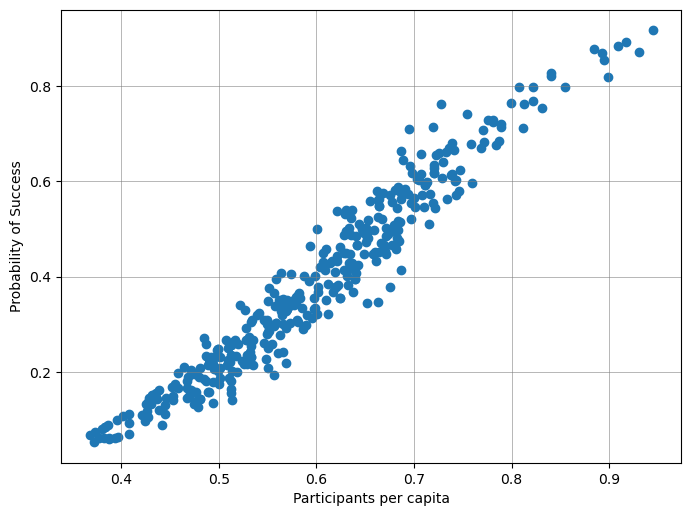

In [10]:
# Stats model library
X = df_cleaned[['MembershipPerCapita', 'LoggedPopulation']]
X = sm.add_constant(X)
y = df_cleaned['SUCCESS']

model = sm.Logit(y,X)
result = model.fit()

df_cleaned['ProbabilitySuccess'] = result.predict(X)

# Scatter plot
plt.figure(figsize = (8,6), dpi = 100)
plt.scatter(df_cleaned['MembershipPerCapita'], df_cleaned['ProbabilitySuccess'])

plt.xlabel('Participants per capita')
plt.ylabel('Probability of Success')

plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.4, color='gray')

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        23:47:41   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8142      1.496     -1.881      0.060      -5.746       0.118
MembershipPerCapita     7.6475      1.166      6.556      0.000       5.361       9.934
LoggedPopulation       -0.1388      0.074     -1.887      0.059      -0.283       0.005
=======================================================================================
"""

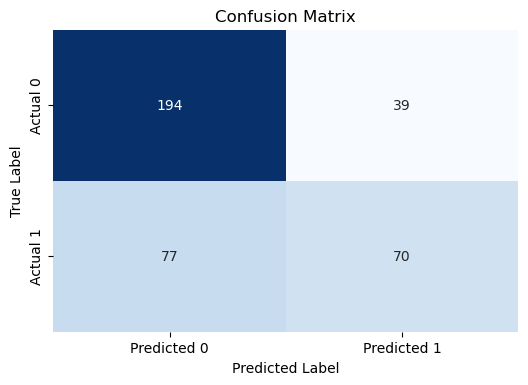

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       233
         1.0       0.64      0.48      0.55       147

    accuracy                           0.69       380
   macro avg       0.68      0.65      0.66       380
weighted avg       0.69      0.69      0.68       380



In [12]:
import seaborn as sns

# Convert predicted probabilities to binary predictions (0 or 1)
df_cleaned['Prediction'] = (df_cleaned['ProbabilitySuccess'] > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create a classification report
class_report = classification_report(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

print(class_report)

From the figures above membership per capita is statistically important for the success of the campaign, which is reasonable according to the findings in the previous questions (judging from the confidence intervals and the p-value). On the contrary the logged population is not statistically important and we could dismiss it. Thus it makes sense to run the logistic regression with only membership per capita as the independent variable.

Further insights are generated from the confusion matrix and the accuracy. Although the model has been trained and is tested on the same data we can see that it is working but it is not great at predicting the success of a campaing. Of course we can always try to fit the data better but that is outside the scope of this excercise.

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


/Users/fanis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


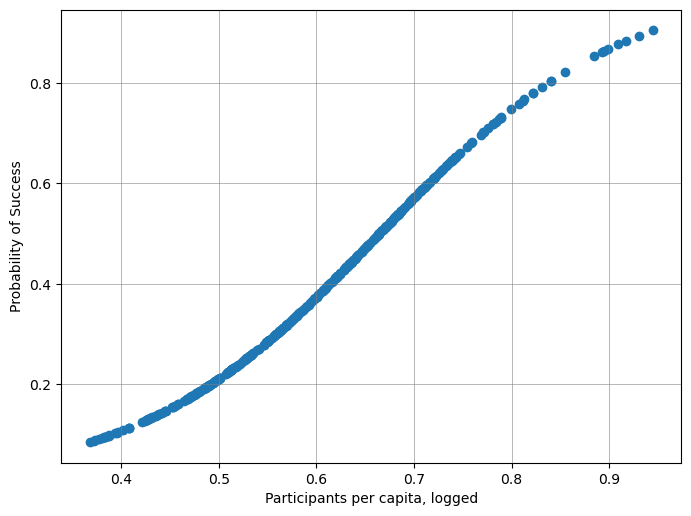

In [13]:
X = df_cleaned[['MembershipPerCapita']]
X = sm.add_constant(X)
y = df_cleaned['SUCCESS']

model = sm.Logit(y,X)
result = model.fit()

df_cleaned['ProbabilitySuccess'] = result.predict(X)

# Scatter plot
plt.figure(figsize = (8,6), dpi = 100)
plt.scatter(df_cleaned['MembershipPerCapita'], df_cleaned['ProbabilitySuccess'])

plt.xlabel('Participants per capita, logged')
plt.ylabel('Probability of Success')

plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.4, color='gray')

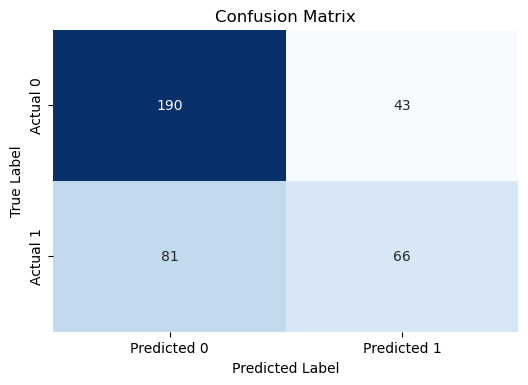

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       233
         1.0       0.61      0.45      0.52       147

    accuracy                           0.67       380
   macro avg       0.65      0.63      0.63       380
weighted avg       0.66      0.67      0.66       380



In [14]:
# Convert predicted probabilities to binary predictions (0 or 1)
df_cleaned['Prediction'] = (df_cleaned['ProbabilitySuccess'] > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create a classification report
class_report = classification_report(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

print(class_report)

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        23:47:54   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MembershipPerCapita     8.0495      1.141      7.052      0.000       5.812      10.287
=======================================================================================
"""

From the figure above we can see that the predictions fit a sort of a line (for every x there is one y) in contrast to the previous logistic regression, which is to be expected since we have only one independent variable and the fixed term.

The performance of the second model is comparable if not better than the first suggesting that the logarithm of the population is not significant in predicting the success of a campaing; something that sounds reasonable as well.

Also both the constant term and the membership per capita are statistically important to the success of a campaing judging both from the confidence intervals and the p-values.

## Question 4 - The Level of Participation Tipping Point

To produce the required table the range for the different bins are defined and the campaings are split into the corresponding bin. Then the observations for each bin are counted and the success rate for each bin is calculated as 
$$
\text{success rate} = \frac{\text{successful campaigns}}{\text{total campaings}}
$$

In [16]:
# Define the ranges
ranges = [(0, 0.0035), (0.0035, 0.015), (0.015, 0.06), (0.06, 0.25), (0.25, 1.0), (1.0, 3.5), (3.5,float('inf'))]

# Create a new column for the range
decimal_digits = 4  # Set the desired number of decimal digits
df['Peak Popular Participation (%)'] = pd.cut(
    df['PERCENTAGEPOPULARPARTICIPATION']*100,
    bins=[range[0] for range in ranges] + [ranges[-1][1]],
    labels=[f'{range[0]:.{decimal_digits}g}% - {range[1]:.{decimal_digits}g}%' for range in ranges]
)

# Group by the new column and calculate the number of observations and success rate
result_df = df.groupby('Peak Popular Participation (%)').agg({
    'PERCENTAGEPOPULARPARTICIPATION': 'count',
    'SUCCESS': 'mean'
}).rename(columns={'PERCENTAGEPOPULARPARTICIPATION': 'Observations', 'SUCCESS': 'Success Rate'}).reset_index()

# Display the result with more decimal digits

result_df_sorted = result_df.sort_values(by='Peak Popular Participation (%)', ascending=False)
result_df_sorted['Success Rate'] = round(result_df_sorted['Success Rate'] * 100,2).apply(lambda x: f'{x:.2f}%')

result_df_sorted['Peak Popular Participation (%)'] = result_df_sorted['Peak Popular Participation (%)'].replace('3.50% - inf%', 'greater than 3.5%')

pd.set_option('display.float_format', lambda x: f'{x:.{decimal_digits}f}'.rstrip('0').rstrip('.'))
result_df_sorted

,Peak Popular Participation (%),Observations,Success Rate
6,3.5% - inf%,18,88.89%
5,1% - 3.5%,41,60.98%
4,0.25% - 1%,92,45.65%
3,0.06% - 0.25%,95,45.26%
2,0.015% - 0.06%,66,24.24%
1,0.0035% - 0.015%,44,9.09%
0,0% - 0.0035%,24,4.17%


From the table above we can derive that campaings with participants per capita more than 3.5% are much more likely to succeed. Historically this is how Chenoweth came up with the 3.5% rule, especially since in NAVCO 1.1 the campaings with participation greater than 3.5% had 100% success rate.

From the table above we can derive that campaings with participants per capita more than 3.5% are much more likely to succeed. Historically this is how Chenoweth came up with the 3.5% rule, especially since in NAVCO 1.1 the campaings with participation greater than 3.5% had 100% success rate. 

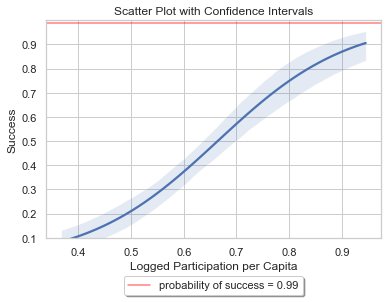

In [18]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot with regression line and confidence intervals
ax = sns.regplot(x='MembershipPerCapita', y='SUCCESS', data=df_cleaned, ci=95, scatter_kws={'s': 0}, logistic=True)

# Plot a horizontal line for SUCCESS = 0.99
ax.axhline(0.99, color='red', linestyle='-', label='probability of success = 0.99', alpha=0.5)

# Set the title and labels
plt.title('Scatter Plot with Confidence Intervals')
plt.xlabel('Logged Participation per Capita')
plt.ylabel('Success')

# Hide points where SUCCESS equals 0.99
ax.set(ylim=(0.1, 0.999))


# Move the legend to the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

## Question 5

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

In [19]:
# Read polity dataframe
df_polity = pd.read_excel('p5v2018.xls')

# Merge the DataFrames based on the specified conditions
merged_df = pd.merge(df_cleaned, df_polity, how='left', left_on=['EYEAR', 'LOCATION'], right_on=['year', 'country'])

In [20]:
# Specify the columns where NaN values should be removed
columns_to_check = ['NONVIOL', 'polity2', 'LoggedPopulation']

# Remove rows with NaN values in the specified columns
merged_df = merged_df.dropna(subset=columns_to_check)

In [21]:
# Define the independent variables (features)
merged_df['LoggedParticipation'] = np.log(merged_df['PARTICIPATION'])

X = merged_df[['NONVIOL', 'polity2', 'LoggedParticipation', 'LoggedPopulation']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = merged_df['SUCCESS']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

merged_df['ProbabilitySuccess'] = result.predict(X)

# Display the summary of the logistic regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.536938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.2025
Time:                        23:48:38   Log-Likelihood:                -159.47
converged:                       True   LL-Null:                       -199.97
Covariance Type:            nonrobust   LLR p-value:                 1.075e-16
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8727      1.498      1.250      0.211      -1.063       4.809
NO

/Users/fanis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


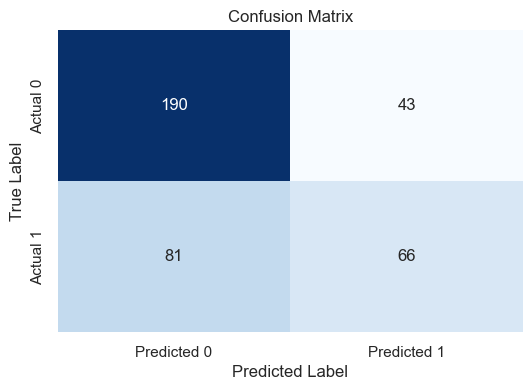

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       233
         1.0       0.61      0.45      0.52       147

    accuracy                           0.67       380
   macro avg       0.65      0.63      0.63       380
weighted avg       0.66      0.67      0.66       380



In [22]:
# Convert predicted probabilities to binary predictions (0 or 1)
df_cleaned['Prediction'] = (df_cleaned['ProbabilitySuccess'] > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create a classification report
class_report = classification_report(df_cleaned['SUCCESS'], df_cleaned['Prediction'])

print(class_report)

Judging from the above the non-violent, polity2 as well as Logged Participation and population are statistically important.